<a href="https://colab.research.google.com/github/S48avio/Day-1--Linear-Regression-With-Gradient-Descent/blob/main/Linear_Regression_With_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression and Gradient Descent

**Linear Regression** is a regression problem where we predict continuous values.  
It is a supervised learning algorithm where we train the model using a dataset and then test it on unseen data.  

The idea of Linear Regression is to find the **best fit line** that represents the training data and can make predictions on test data.

---

## Equation of a Line
The equation of a straight line is:  

$$ y = mx + c $$

- **m** = slope of the line (how much y changes when x changes by 1)  
- **c** = intercept (value of y when x = 0)  

So, our task is to learn the best values of **m** and **c**.

---

## Loss Function
We use **Mean Squared Error (MSE)** as the loss function:  

$$ J(m,c) = \frac{1}{N} \sum_{i=1}^{N} \left( y_i - (mx_i + c) \right)^2 $$  

The goal is to minimize this loss function.

---

## Gradient Descent (GD)

Gradient Descent is an optimization algorithm used to minimize the loss function.  
The idea is to start with some random values for **m** and **c**, then update them iteratively to reduce the loss.

---

### Update Rules

1. Compute gradients (partial derivatives):

$$ \frac{\partial J}{\partial m} = -\frac{2}{N} \sum_{i=1}^{N} x_i \left( y_i - (mx_i + c) \right) $$

$$ \frac{\partial J}{\partial c} = -\frac{2}{N} \sum_{i=1}^{N} \left( y_i - (mx_i + c) \right) $$

---

2. Update parameters:

$$ m := m - \alpha \cdot \frac{\partial J}{\partial m} $$

$$ c := c - \alpha \cdot \frac{\partial J}{\partial c} $$

Where **α** (alpha) is the **learning rate**, which controls the step size.  

---

### Intuition
- If gradient > 0 → decrease the parameter value.  
- If gradient < 0 → increase the parameter value.  
- Repeat until gradients are very small (close to 0).  

At that point, the model has found the **best fit line**.


In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhishek14398/salary-dataset-simple-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/salary-dataset-simple-linear-regression


In [21]:
import pandas as pd

data=pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
data.head()


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


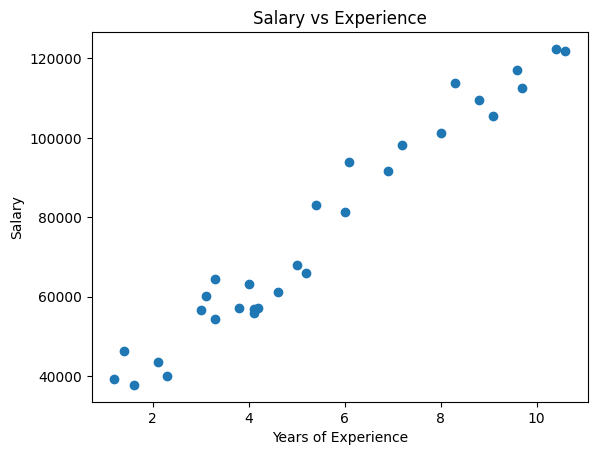

In [22]:
import matplotlib.pyplot as plt
plt.scatter(data.YearsExperience,data.Salary)
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

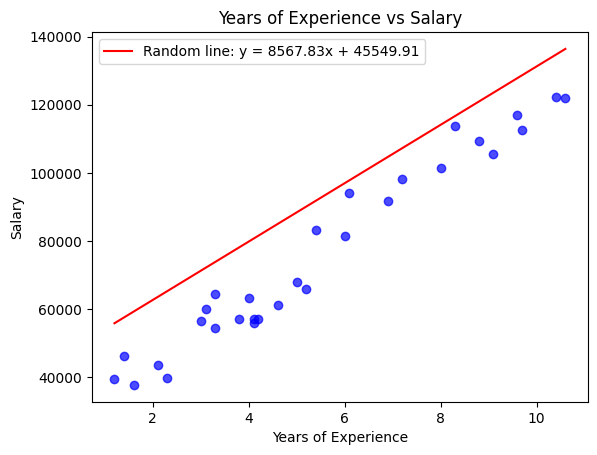

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(data.YearsExperience, data.Salary, c='blue', alpha=0.7)
plt.title("Years of Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

# Random slope (m) and intercept (b)
m = np.random.rand() * 10000   # random slope
c = np.random.rand() * 50000   # random intercept

# Generate line values
x_vals = np.linspace(data.YearsExperience.min(), data.YearsExperience.max(), 100)
y_vals = m * x_vals + c

# Plot the random line
plt.plot(x_vals, y_vals, color="red", label=f"Random line: y = {m:.2f}x + {c:.2f}")
plt.legend()

plt.show()


In [24]:
print(f'the slope is {m}')
print(f'the intercept is {c}')

the slope is 8567.82710344389
the intercept is 45549.911554843435


In [25]:
#Mean squared error
import numpy as np
def mse_loss(y,y_pred):
  return np.mean((y-y_pred)**2)

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent function
def gradient_descent(x, y, lr=0.01, epochs=1000):
    m, c = 0, 0  # initial slope & intercept
    n = len(x)

    for epoch in range(epochs + 1):
        y_pred = m * x + c


        # Calculate gradients
        error = y - y_pred

        # Gradients
        dm = -(2/n) * np.sum(x * error)
        dc = -(2/n) * np.sum(error)

        # Update parameters
        m -= lr * dm
        c -= lr * dc

        # Loss (MSE)
        loss = np.mean(error ** 2)

        # Print progress
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: m={m:.4f}, c={c:.4f}, loss={loss:.4f}")

            # Plotting
            plt.scatter(x, y, color="blue", label="Data")
            plt.plot(x, m * x + c, color="red", label=f"Epoch {epoch}")
            plt.xlabel("Years Experience")
            plt.ylabel("Salary")
            plt.title(f"Regression Line at Epoch {epoch}")
            plt.legend()
            plt.show()

    return m, c


Epoch 0: m=0.0196, c=0.0000, loss=1.0000


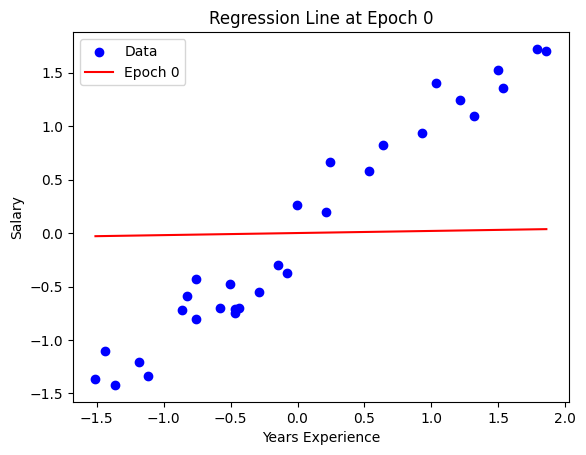

Epoch 100: m=0.8511, c=-0.0000, loss=0.0599


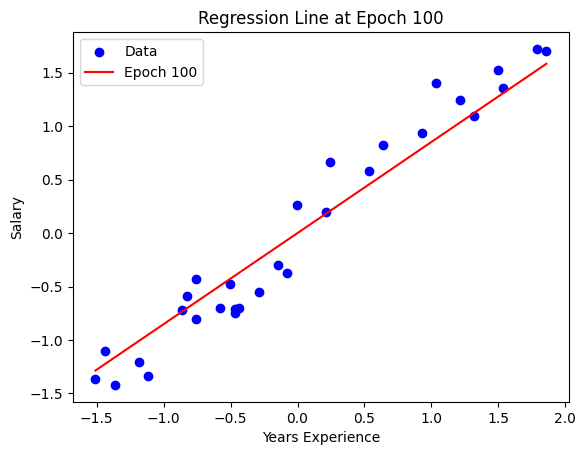

Epoch 200: m=0.9614, c=-0.0000, loss=0.0433


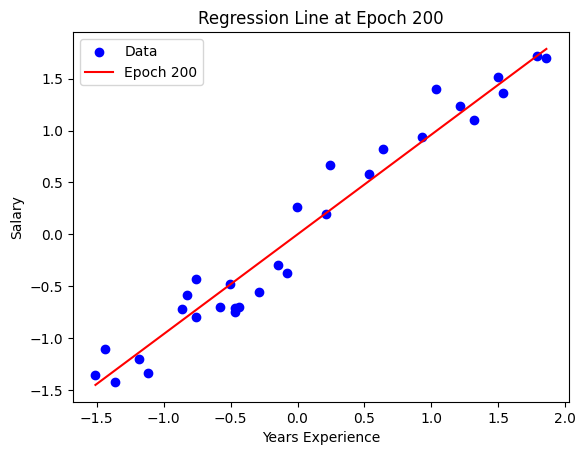

Epoch 300: m=0.9760, c=-0.0000, loss=0.0430


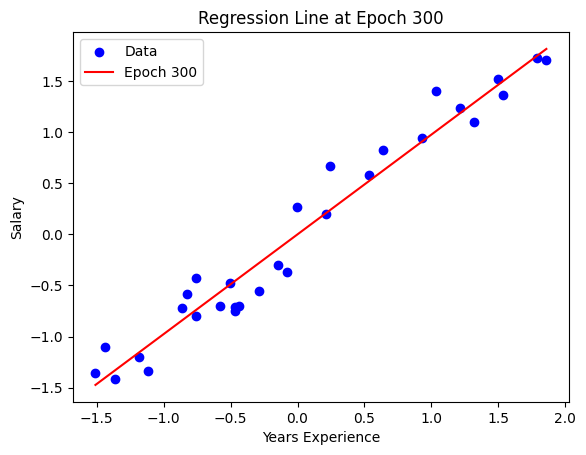

Epoch 400: m=0.9779, c=-0.0000, loss=0.0430


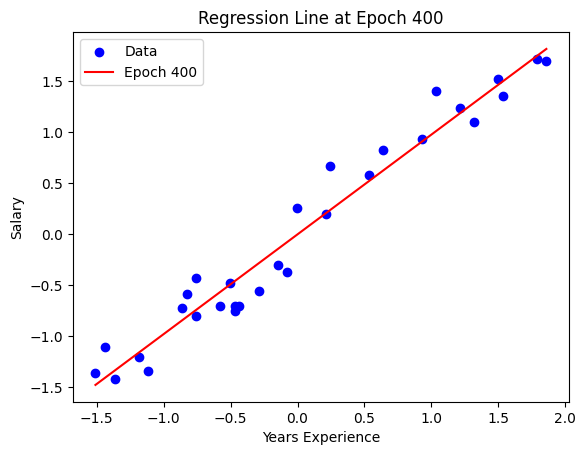

Epoch 500: m=0.9782, c=-0.0000, loss=0.0430


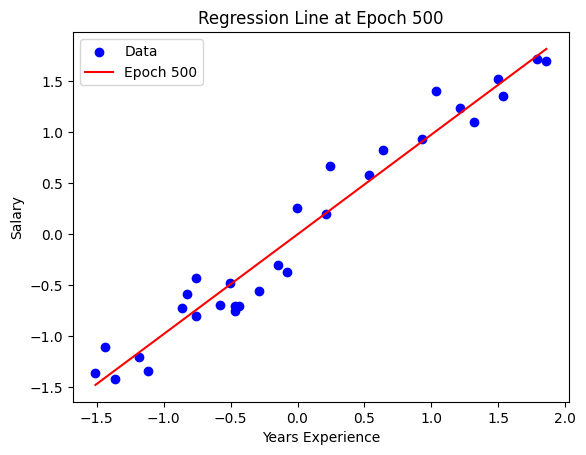

Epoch 600: m=0.9782, c=-0.0000, loss=0.0430


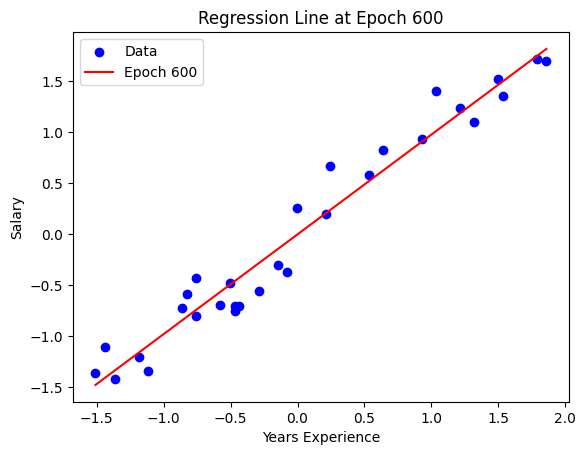

Epoch 700: m=0.9782, c=-0.0000, loss=0.0430


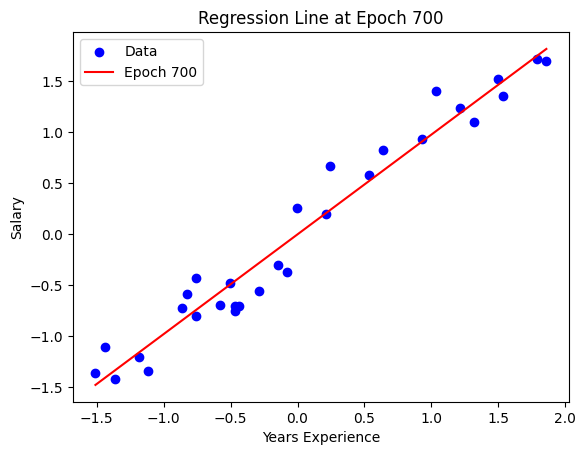

Epoch 800: m=0.9782, c=-0.0000, loss=0.0430


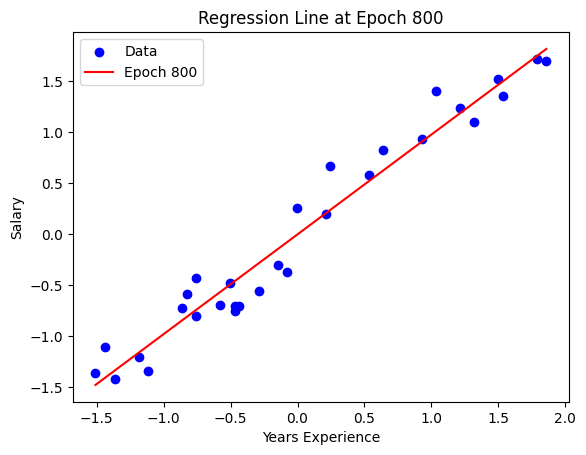

Epoch 900: m=0.9782, c=-0.0000, loss=0.0430


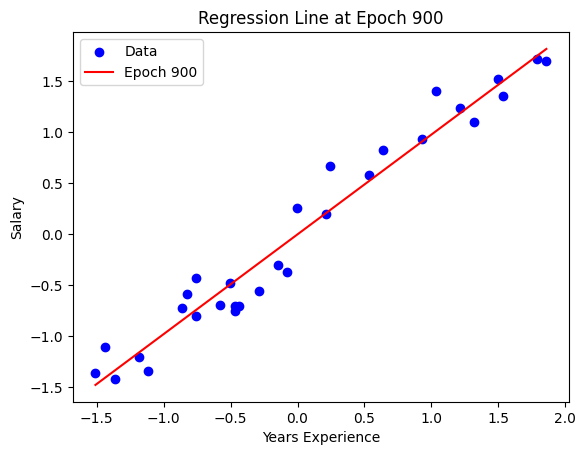

Epoch 1000: m=0.9782, c=-0.0000, loss=0.0430


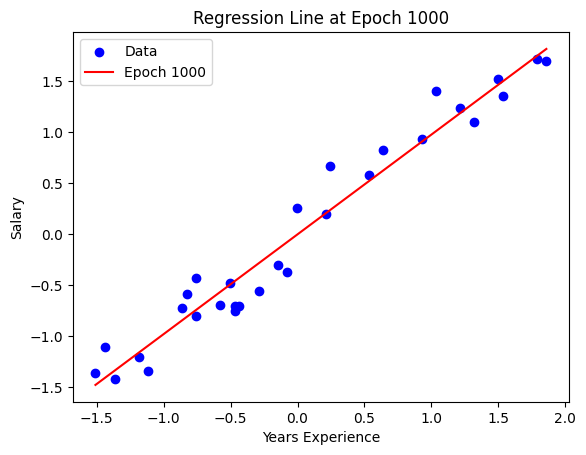

In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
X = data[["YearsExperience"]].values  # 2D array
y = data[["Salary"]].values  # also make it 2D for scaler

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_scaled = scaler.fit_transform(y)

# Now run gradient descent on X_scaled, y_scaled
m, c = gradient_descent(X_scaled,y_scaled)

In [35]:
# Example in Python
from sklearn.preprocessing import StandardScaler

# Assuming y_scaler was fit on data.Salary before scaling
y_pred_scaled = m * 6 + c
print(y_pred_scaled)
y_pred_original = scaler.inverse_transform([[y_pred_scaled]])
print(y_pred_original)

5.869449701252029
[[234207.09440033]]
